In [1]:
# vishrut bhavsar
import pandas as pd
import numpy as np

In [2]:
cf_train=pd.read_csv('counterfeit_train.csv')
cf_test=pd.read_csv('counterfeit_test.csv')

In [3]:
cf_test['Counterfeit_Sales']=np.nan
cf_train['data']='train'
cf_test['data']='test'
cf_test=cf_test[cf_train.columns]
cf_all=pd.concat([cf_train,cf_test],axis=0,ignore_index=True)

In [4]:
cf_all.shape

(8523, 13)

In [5]:
cf_all['Medicine_Type'].value_counts()

Antibiotics           1232
Hreplacements         1200
Antiseptics            910
OralContraceptives     856
Antipyretics           682
Cardiac                649
Mstablizers            648
Tranquilizers          520
Analgesics             445
Antimalarial           425
Antacids               251
Statins                214
MuscleRelaxants        169
Antifungal             148
Stimulants             110
Antiviral               64
Name: Medicine_Type, dtype: int64

In [6]:
cf_all['sideffect']=np.where(cf_all['SidEffect_Level']=='mild',1,0)
cf_all=cf_all.drop('SidEffect_Level',axis=1)


In [7]:
cf_all['Area_Type'].value_counts()


DownTown              5577
MidTownResidential    1083
CityLimits             935
Industrial             928
Name: Area_Type, dtype: int64

In [8]:
cf_all.head(5)

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data,sideffect
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,0.070422,DownTown,Tier 1,Small,1775.5026,train,0
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,0.013000,CityLimits,Tier 3,Medium,3069.1520,train,1
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,0.060783,DownTown,Tier 1,Small,2603.0920,train,1
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,0.065555,DownTown,Tier 1,Small,1101.7130,train,1
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,0.248859,MidTownResidential,Tier 1,Small,158.9402,train,0


In [9]:
cf_all['DT']=np.where(cf_all['Area_Type']=='DownTown',1,0)
cf_all['MTR']=np.where(cf_all['Area_Type']=='MidTownResidential',1,0)
cf_all['AreaName']=np.where(cf_all['Area_Type']=='CityLimits',1,0)
cf_all=cf_all.drop('Area_Type',axis=1)

In [10]:
cf_all.head(5)

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,Availability_rating,Area_City_Type,Area_dist_level,Counterfeit_Sales,data,sideffect,DT,MTR,AreaName
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,0.070422,Tier 1,Small,1775.5026,train,0,1,0,0
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,0.013000,Tier 3,Medium,3069.1520,train,1,0,0,1
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,0.060783,Tier 1,Small,2603.0920,train,1,1,0,0
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,0.065555,Tier 1,Small,1101.7130,train,1,1,0,0
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,0.248859,Tier 1,Small,158.9402,train,0,0,1,0


In [11]:
cf_all['T3']=np.where(cf_all['Area_City_Type']=='Tier 3',1,0)
cf_all['T2']=np.where(cf_all['Area_City_Type']=='Tier 2',1,0)
cf_all=cf_all.drop(['Area_City_Type'],axis=1)

In [12]:
cf_all['medium']=np.where(cf_all['Area_dist_level']=='Medium',1,0)
cf_all['unknown']=np.where(cf_all['Area_dist_level']=='Unknown',1,0)
cf_all['small']=np.where(cf_all['Area_dist_level']=='Small',1,0)
cf_all=cf_all.drop('Area_dist_level',axis=1)

In [13]:
cat_cols=cf_all.select_dtypes(['object']).columns

In [14]:
cat_cols

Index(['Medicine_ID', 'DistArea_ID', 'Medicine_Type', 'data'], dtype='object')

In [15]:

MT_dummies=pd.get_dummies(cf_all['Medicine_Type'],prefix='MM')

In [16]:
MT_dummies.head()

,MM_Analgesics,MM_Antacids,MM_Antibiotics,MM_Antifungal,MM_Antimalarial,MM_Antipyretics,MM_Antiseptics,MM_Antiviral,MM_Cardiac,MM_Hreplacements,MM_Mstablizers,MM_MuscleRelaxants,MM_OralContraceptives,MM_Statins,MM_Stimulants,MM_Tranquilizers
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [17]:

cf_all=pd.concat([cf_all,MT_dummies],axis=1)
cf_all=cf_all.drop(['Medicine_Type','MM_Antiviral'],axis=1)

In [18]:
cf_all.shape

(8523, 32)

In [19]:

cf_all=cf_all.drop(['Medicine_ID','DistArea_ID'],axis=1)

In [20]:
for col in cf_all.columns:
    if(col not in ['Counterfeit_Sales','data']) & (cf_all[col].isnull().sum()>0):
        cf_all.loc[cf_all[col].isnull(),col]=cf_all.loc[cf_all['data']=='train',col].mean()

In [21]:
cf_all.isnull().sum()

Counterfeit_Weight          0
Active_Since                0
Medicine_MRP                0
Availability_rating         0
Counterfeit_Sales        1705
data                        0
sideffect                   0
DT                          0
MTR                         0
AreaName                    0
T3                          0
T2                          0
medium                      0
unknown                     0
small                       0
MM_Analgesics               0
MM_Antacids                 0
MM_Antibiotics              0
MM_Antifungal               0
MM_Antimalarial             0
MM_Antipyretics             0
MM_Antiseptics              0
MM_Cardiac                  0
MM_Hreplacements            0
MM_Mstablizers              0
MM_MuscleRelaxants          0
MM_OralContraceptives       0
MM_Statins                  0
MM_Stimulants               0
MM_Tranquilizers            0
dtype: int64

In [22]:
cf_train=cf_all[cf_all['data']=='train']
del cf_train['data']
cf_test=cf_all[cf_all['data']=='test']
cf_test.drop(['Counterfeit_Sales','data'],axis=1,inplace=True)

C:\Users\gtu\AppData\Local\Temp\ipykernel_10300\183993018.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cf_test.drop(['Counterfeit_Sales','data'],axis=1,inplace=True)


In [23]:
del cf_all

In [24]:
pip install sklearn

  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2337 sha256=f97cfef35007858dd23f33bd03f38151ddb02550812bc4280ff684708392266e
  Stored in directory: c:\users\gtu\appdata\local\pip\cache\wheels\f8\e0\3d\9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [25]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [26]:
cf_train1,cf_train2=train_test_split(cf_train, test_size=.2, random_state=2)

In [27]:
x_train1=cf_train1.drop('Counterfeit_Sales',axis=1)
y_train1=cf_train1['Counterfeit_Sales']
x_train2=cf_train2.drop('Counterfeit_Sales',axis=1)
y_train2=cf_train2['Counterfeit_Sales']

In [28]:
lm=LinearRegression()
lm.fit(x_train1,y_train1)
x_train1.shape
lm.intercept_
list(zip(x_train1.columns,lm.coef_))
predicted_ir=lm.predict(x_train2)

In [29]:
mean_absolute_error(cf_train2['Counterfeit_Sales'],predicted_ir)

830.0501468413134

In [30]:
y_train2=cf_train2['Counterfeit_Sales']

In [31]:
from sklearn.metrics import r2_score

In [32]:
r2_score(predicted_ir,y_train2)

0.18276366063437077

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rf=RandomForestRegressor(n_estimators=600,criterion='mse',max_depth=6,bootstrap=True,min_samples_split=2)

In [35]:
rf.fit(x_train1,y_train1)

C:\Users\gtu\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse', max_depth=6, n_estimators=600)

In [36]:
predicted_rf=rf.predict(x_train2)
xx=mean_absolute_error(cf_train2['Counterfeit_Sales'],predicted_rf)
print(xx)

756.416051770588


In [37]:
score=1-(xx/1660)
print(score)

0.5443276796562724


In [38]:
cf_test.corr()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,sideffect,DT,MTR,AreaName,T3,T2,...,MM_Antipyretics,MM_Antiseptics,MM_Cardiac,MM_Hreplacements,MM_Mstablizers,MM_MuscleRelaxants,MM_OralContraceptives,MM_Statins,MM_Stimulants,MM_Tranquilizers
Counterfeit_Weight,1.000000,0.019625,0.020396,-0.001354,0.019360,0.020499,-0.015070,-0.015328,-0.019214,-0.003858,...,0.040473,0.049104,-0.024583,-0.005999,-0.039591,0.015601,0.015100,-0.054536,-0.039326,0.025936
Active_Since,0.019625,1.000000,0.013036,-0.071253,-0.004018,0.227603,-0.260156,-0.557240,-0.326736,0.519914,...,0.065547,-0.006602,-0.000103,0.006762,-0.034082,-0.014061,0.003846,0.002452,-0.019638,0.043054
Medicine_MRP,0.020396,0.013036,1.000000,0.006132,0.022535,-0.006731,0.018030,-0.008198,-0.018252,0.005627,...,0.054667,0.069748,-0.013840,0.028050,-0.070768,-0.034707,-0.038464,-0.022614,-0.013936,-0.048205
Availability_rating,-0.001354,-0.071253,0.006132,1.000000,-0.027833,-0.141528,0.308442,-0.077333,0.022450,-0.098760,...,0.018627,-0.022096,0.025111,-0.021657,0.058426,0.000654,-0.025543,0.031995,0.036814,-0.038511
sideffect,0.019360,-0.004018,0.022535,-0.027833,1.000000,-0.005515,-0.008861,-0.000144,0.036058,-0.006906,...,-0.020630,0.265191,-0.058791,-0.076761,-0.095604,0.101422,-0.066069,0.127596,-0.059077,0.189166
DT,0.020499,0.227603,-0.006731,-0.141528,-0.005515,1.000000,-0.502789,-0.489039,-0.656993,0.508189,...,0.026898,0.013492,0.011013,-0.014459,-0.000624,0.006662,-0.004742,0.028317,-0.034633,-0.022303
MTR,-0.015070,-0.260156,0.018030,0.308442,-0.008861,-0.502789,1.000000,-0.136627,0.099511,-0.255512,...,-0.019022,0.017695,0.022824,-0.024247,0.036448,0.004140,-0.017973,0.002302,0.022026,-0.010001
AreaName,-0.015328,-0.557240,-0.008198,-0.077333,-0.000144,-0.489039,-0.136627,1.000000,0.439456,-0.248524,...,-0.039905,-0.010630,-0.020114,-0.001487,0.015453,0.006667,0.006198,-0.039111,0.004694,-0.013422
T3,-0.019214,-0.326736,-0.018252,0.022450,0.036058,-0.656993,0.099511,0.439456,1.000000,-0.565528,...,-0.019251,0.004525,-0.030768,0.005978,-0.002757,-0.029311,0.016138,-0.001154,0.024101,0.011366
T2,-0.003858,0.519914,0.005627,-0.098760,-0.006906,0.508189,-0.255512,-0.248524,-0.565528,1.000000,...,0.039063,0.024179,0.022570,-0.022664,0.006938,-0.043314,-0.010326,0.000668,-0.037239,-0.020005


In [39]:
cf_train.corr()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales,sideffect,DT,MTR,AreaName,T3,...,MM_Antipyretics,MM_Antiseptics,MM_Cardiac,MM_Hreplacements,MM_Mstablizers,MM_MuscleRelaxants,MM_OralContraceptives,MM_Statins,MM_Stimulants,MM_Tranquilizers
Counterfeit_Weight,1.000000e+00,-0.011901,0.025962,-0.015136,0.004882,0.021866,-0.005211,0.005478,2.143193e-14,0.016456,...,0.030782,0.032628,-0.032679,0.014418,-0.030943,0.029980,-0.002623,-0.045577,0.005748,0.011458
Active_Since,-1.190111e-02,1.000000,0.002996,-0.075744,-0.039595,-0.002949,0.249495,-0.286403,-5.331931e-01,-0.335730,...,-0.023722,-0.000768,0.013740,0.001639,0.004258,-0.000279,0.008613,0.007748,-0.004254,-0.014233
Medicine_MRP,2.596169e-02,0.002996,1.000000,-0.003216,0.573684,-0.013380,0.007782,-0.009821,-6.274072e-03,0.003759,...,0.030604,0.040996,-0.003650,0.035168,-0.066406,-0.014872,-0.007276,-0.006721,0.004476,-0.040060
Availability_rating,-1.513559e-02,-0.075744,-0.003216,1.000000,-0.124058,-0.052319,-0.144982,0.280934,-4.425562e-02,0.006420,...,0.040574,-0.034816,0.007612,0.012267,0.006189,-0.020242,0.002320,-0.013246,0.044929,-0.057759
Counterfeit_Sales,4.882495e-03,-0.039595,0.573684,-0.124058,1.000000,-0.016901,0.115059,-0.414778,3.062259e-01,0.045004,...,0.002094,0.017509,0.014012,0.023062,-0.039751,-0.016145,-0.007031,0.002701,-0.000043,-0.029678
sideffect,2.186562e-02,-0.002949,-0.013380,-0.052319,-0.016901,1.000000,0.000543,0.005758,2.036453e-06,-0.009238,...,-0.021234,0.252740,-0.076896,-0.055968,-0.080702,0.105781,-0.089854,0.116190,-0.067652,0.187870
DT,-5.210696e-03,0.249495,0.007782,-0.144982,0.115059,0.000543,1.000000,-0.530627,-4.813299e-01,-0.631163,...,-0.002613,-0.001841,-0.001249,0.003126,0.002555,-0.009523,0.013165,0.002484,-0.003788,-0.001333
MTR,5.477724e-03,-0.286403,-0.009821,0.280934,-0.414778,0.005758,-0.530627,1.000000,-1.332036e-01,0.091861,...,0.013649,0.000423,-0.021195,-0.002470,-0.004679,0.016158,-0.004155,-0.009607,0.014365,0.004056
AreaName,2.143193e-14,-0.533193,-0.006274,-0.044256,0.306226,0.000002,-0.481330,-0.133204,1.000000e+00,0.435267,...,-0.003132,0.001459,0.006629,0.007811,-0.007901,-0.013334,-0.009095,0.009169,-0.005008,0.009290
T3,1.645589e-02,-0.335730,0.003759,0.006420,0.045004,-0.009238,-0.631163,0.091861,4.352670e-01,1.000000,...,-0.000809,0.004947,0.001955,-0.006926,-0.002457,-0.004529,-0.013182,-0.000061,0.000015,0.011819


In [41]:
import seaborn as sns

In [43]:
cor = cf_train.corr()
cor

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales,sideffect,DT,MTR,AreaName,T3,...,MM_Antipyretics,MM_Antiseptics,MM_Cardiac,MM_Hreplacements,MM_Mstablizers,MM_MuscleRelaxants,MM_OralContraceptives,MM_Statins,MM_Stimulants,MM_Tranquilizers
Counterfeit_Weight,1.000000e+00,-0.011901,0.025962,-0.015136,0.004882,0.021866,-0.005211,0.005478,2.143193e-14,0.016456,...,0.030782,0.032628,-0.032679,0.014418,-0.030943,0.029980,-0.002623,-0.045577,0.005748,0.011458
Active_Since,-1.190111e-02,1.000000,0.002996,-0.075744,-0.039595,-0.002949,0.249495,-0.286403,-5.331931e-01,-0.335730,...,-0.023722,-0.000768,0.013740,0.001639,0.004258,-0.000279,0.008613,0.007748,-0.004254,-0.014233
Medicine_MRP,2.596169e-02,0.002996,1.000000,-0.003216,0.573684,-0.013380,0.007782,-0.009821,-6.274072e-03,0.003759,...,0.030604,0.040996,-0.003650,0.035168,-0.066406,-0.014872,-0.007276,-0.006721,0.004476,-0.040060
Availability_rating,-1.513559e-02,-0.075744,-0.003216,1.000000,-0.124058,-0.052319,-0.144982,0.280934,-4.425562e-02,0.006420,...,0.040574,-0.034816,0.007612,0.012267,0.006189,-0.020242,0.002320,-0.013246,0.044929,-0.057759
Counterfeit_Sales,4.882495e-03,-0.039595,0.573684,-0.124058,1.000000,-0.016901,0.115059,-0.414778,3.062259e-01,0.045004,...,0.002094,0.017509,0.014012,0.023062,-0.039751,-0.016145,-0.007031,0.002701,-0.000043,-0.029678
sideffect,2.186562e-02,-0.002949,-0.013380,-0.052319,-0.016901,1.000000,0.000543,0.005758,2.036453e-06,-0.009238,...,-0.021234,0.252740,-0.076896,-0.055968,-0.080702,0.105781,-0.089854,0.116190,-0.067652,0.187870
DT,-5.210696e-03,0.249495,0.007782,-0.144982,0.115059,0.000543,1.000000,-0.530627,-4.813299e-01,-0.631163,...,-0.002613,-0.001841,-0.001249,0.003126,0.002555,-0.009523,0.013165,0.002484,-0.003788,-0.001333
MTR,5.477724e-03,-0.286403,-0.009821,0.280934,-0.414778,0.005758,-0.530627,1.000000,-1.332036e-01,0.091861,...,0.013649,0.000423,-0.021195,-0.002470,-0.004679,0.016158,-0.004155,-0.009607,0.014365,0.004056
AreaName,2.143193e-14,-0.533193,-0.006274,-0.044256,0.306226,0.000002,-0.481330,-0.133204,1.000000e+00,0.435267,...,-0.003132,0.001459,0.006629,0.007811,-0.007901,-0.013334,-0.009095,0.009169,-0.005008,0.009290
T3,1.645589e-02,-0.335730,0.003759,0.006420,0.045004,-0.009238,-0.631163,0.091861,4.352670e-01,1.000000,...,-0.000809,0.004947,0.001955,-0.006926,-0.002457,-0.004529,-0.013182,-0.000061,0.000015,0.011819


<AxesSubplot:>

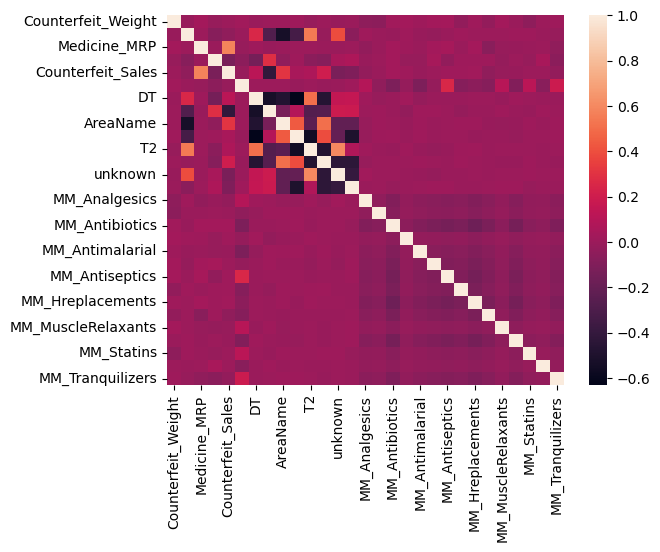

In [44]:
sns.heatmap(cf_train.corr())

In [45]:
cor = cf_test.corr()
cor

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,sideffect,DT,MTR,AreaName,T3,T2,...,MM_Antipyretics,MM_Antiseptics,MM_Cardiac,MM_Hreplacements,MM_Mstablizers,MM_MuscleRelaxants,MM_OralContraceptives,MM_Statins,MM_Stimulants,MM_Tranquilizers
Counterfeit_Weight,1.000000,0.019625,0.020396,-0.001354,0.019360,0.020499,-0.015070,-0.015328,-0.019214,-0.003858,...,0.040473,0.049104,-0.024583,-0.005999,-0.039591,0.015601,0.015100,-0.054536,-0.039326,0.025936
Active_Since,0.019625,1.000000,0.013036,-0.071253,-0.004018,0.227603,-0.260156,-0.557240,-0.326736,0.519914,...,0.065547,-0.006602,-0.000103,0.006762,-0.034082,-0.014061,0.003846,0.002452,-0.019638,0.043054
Medicine_MRP,0.020396,0.013036,1.000000,0.006132,0.022535,-0.006731,0.018030,-0.008198,-0.018252,0.005627,...,0.054667,0.069748,-0.013840,0.028050,-0.070768,-0.034707,-0.038464,-0.022614,-0.013936,-0.048205
Availability_rating,-0.001354,-0.071253,0.006132,1.000000,-0.027833,-0.141528,0.308442,-0.077333,0.022450,-0.098760,...,0.018627,-0.022096,0.025111,-0.021657,0.058426,0.000654,-0.025543,0.031995,0.036814,-0.038511
sideffect,0.019360,-0.004018,0.022535,-0.027833,1.000000,-0.005515,-0.008861,-0.000144,0.036058,-0.006906,...,-0.020630,0.265191,-0.058791,-0.076761,-0.095604,0.101422,-0.066069,0.127596,-0.059077,0.189166
DT,0.020499,0.227603,-0.006731,-0.141528,-0.005515,1.000000,-0.502789,-0.489039,-0.656993,0.508189,...,0.026898,0.013492,0.011013,-0.014459,-0.000624,0.006662,-0.004742,0.028317,-0.034633,-0.022303
MTR,-0.015070,-0.260156,0.018030,0.308442,-0.008861,-0.502789,1.000000,-0.136627,0.099511,-0.255512,...,-0.019022,0.017695,0.022824,-0.024247,0.036448,0.004140,-0.017973,0.002302,0.022026,-0.010001
AreaName,-0.015328,-0.557240,-0.008198,-0.077333,-0.000144,-0.489039,-0.136627,1.000000,0.439456,-0.248524,...,-0.039905,-0.010630,-0.020114,-0.001487,0.015453,0.006667,0.006198,-0.039111,0.004694,-0.013422
T3,-0.019214,-0.326736,-0.018252,0.022450,0.036058,-0.656993,0.099511,0.439456,1.000000,-0.565528,...,-0.019251,0.004525,-0.030768,0.005978,-0.002757,-0.029311,0.016138,-0.001154,0.024101,0.011366
T2,-0.003858,0.519914,0.005627,-0.098760,-0.006906,0.508189,-0.255512,-0.248524,-0.565528,1.000000,...,0.039063,0.024179,0.022570,-0.022664,0.006938,-0.043314,-0.010326,0.000668,-0.037239,-0.020005


<AxesSubplot:>

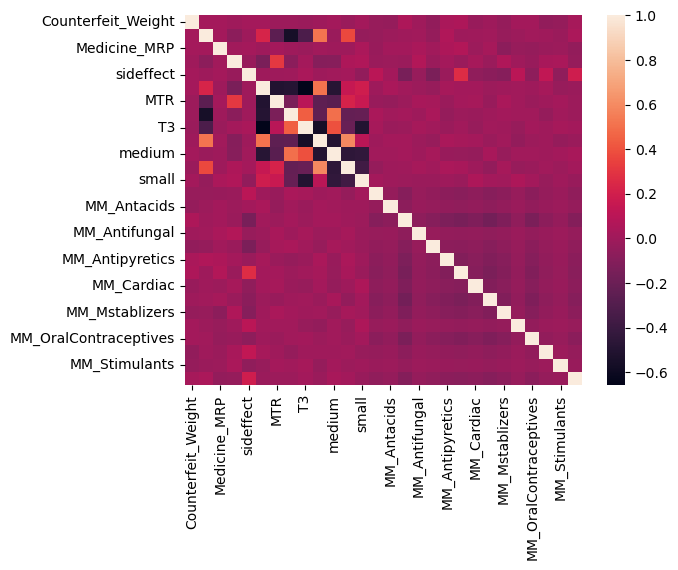

In [46]:
sns.heatmap(cf_test.corr())

In [47]:
cf_train

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales,sideffect,DT,MTR,AreaName,T3,...,MM_Antipyretics,MM_Antiseptics,MM_Cardiac,MM_Hreplacements,MM_Mstablizers,MM_MuscleRelaxants,MM_OralContraceptives,MM_Statins,MM_Stimulants,MM_Tranquilizers
0,13.100000,1995,160.2366,0.070422,1775.5026,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14.115057,1983,110.4384,0.013000,3069.1520,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
2,9.025000,1995,259.4092,0.060783,2603.0920,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,11.800000,1995,99.9830,0.065555,1101.7130,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,14.115057,1983,56.4402,0.248859,158.9402,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,8.535000,1995,204.1452,0.112963,2070.4520,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6814,20.650000,1995,235.1088,0.131103,2126.3792,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6815,20.000000,2005,193.6292,0.105096,2119.7212,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6816,10.180000,2000,162.8682,0.099957,1485.2138,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
cf_test

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,sideffect,DT,MTR,AreaName,T3,T2,...,MM_Antipyretics,MM_Antiseptics,MM_Cardiac,MM_Hreplacements,MM_Mstablizers,MM_MuscleRelaxants,MM_OralContraceptives,MM_Statins,MM_Stimulants,MM_Tranquilizers
6818,14.115057,1983,85.5328,0.112747,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6819,13.450000,2000,257.1460,0.144446,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6820,7.100000,2000,98.1172,0.144221,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
6821,18.300000,1996,135.3730,0.100388,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6822,14.115057,1983,112.8016,0.022585,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,14.115057,1983,136.5704,0.050505,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
8519,21.300000,2002,57.0744,0.041118,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8520,20.400000,2005,182.7422,0.191273,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
8521,20.000000,2007,266.9672,0.013000,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
